#### 1. Importing libraries, datasets, cleaning and preparing the datasets to be merged

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import geopandas as gpd
import geoplot

In [2]:
# This command prompts matplotlib visuals to appear in the notebook.

%matplotlib inline

In [3]:
path = r'C:\Users\

In [5]:
import shapefile as shp
import matplotlib.pyplot as plt

In [6]:
# Import ".json" file for the berlin distict shape outline using the Geopandas `read_csv` command.
berlin = gpd.read_file(os.path.join(path, '2 - AirBnB - Data', 'Original Data', 'berlin_districts.geojson'))

#### using a geojson file as not suitable shape file has been found for the city of Berlin (data source: https://opendata-esri-de.opendata.arcgis.com/)

In [7]:
berlin

,FID,gml_id,Gemeinde_n,Gemeinde_s,Land_name,Land_schlu,Schluessel,SHAPE_Length,SHAPE_Area,geometry
0,1,s_wfs_alkis_bezirk.F176__1,Reinickendorf,012,Berlin,11,11000012,0.637384,0.011846,"MULTIPOLYGON (((13.32074 52.62660, 13.32104 52..."
1,2,s_wfs_alkis_bezirk.F176__2,Charlottenburg-Wilmersdorf,004,Berlin,11,11000004,0.542897,0.008561,"MULTIPOLYGON (((13.32111 52.52446, 13.32137 52..."
2,3,s_wfs_alkis_bezirk.F176__3,Treptow-Köpenick,009,Berlin,11,11000009,1.111521,0.022161,"MULTIPOLYGON (((13.57925 52.39083, 13.57894 52..."
3,4,s_wfs_alkis_bezirk.F176__4,Pankow,003,Berlin,11,11000003,0.784894,0.013689,"MULTIPOLYGON (((13.50481 52.61960, 13.50484 52..."
4,5,s_wfs_alkis_bezirk.F176__5,Neukölln,008,Berlin,11,11000008,0.482223,0.005938,"MULTIPOLYGON (((13.45832 52.48569, 13.45856 52..."
5,6,s_wfs_alkis_bezirk.F176__6,Lichtenberg,011,Berlin,11,11000011,0.545924,0.006902,"MULTIPOLYGON (((13.52316 52.47424, 13.52289 52..."
6,7,s_wfs_alkis_bezirk.F176__7,Marzahn-Hellersdorf,010,Berlin,11,11000010,0.487570,0.008184,"MULTIPOLYGON (((13.61317 52.47213, 13.61298 52..."
7,8,s_wfs_alkis_bezirk.F176__8,Spandau,005,Berlin,11,11000005,0.722821,0.012165,"MULTIPOLYGON (((13.23119 52.56124, 13.23135 52..."
8,9,s_wfs_alkis_bezirk.F176__9,Steglitz-Zehlendorf,006,Berlin,11,11000006,0.791122,0.013552,"MULTIPOLYGON (((13.31952 52.46699, 13.31984 52..."
9,10,s_wfs_alkis_bezirk.F176__10,Mitte,001,Berlin,11,11000001,0.438594,0.005218,"MULTIPOLYGON (((13.37721 52.56091, 13.37727 52..."


In [8]:
# import the Airbnb data set
df_airbnb = pd.read_csv(os.path.join(path, '2 - AirBnB - Data', 'Prepared Data', 'df_airbnb_v2_rev.csv'))

In [9]:
df_airbnb.head()

,Unnamed: 0,Unnamed: 0.1,id,name,host_id,host_name,area,district,latitude,longitude,room_type,price,min_nights,nr_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price category
0,0,0,1944,bright & airy Pberg/Mitte 3 months or more,2164,Lulah,Mitte,Brunnenstr. Nord,52.54425,13.39749,Private room,20,60,18,2018-11-11,0.20,3,251,low price
1,1,1,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53454,13.40256,Entire home/apt,59,5,135,2021-02-12,2.24,6,173,middle price
2,2,2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53500,13.41758,Entire home/apt,90,62,147,2021-01-01,1.03,1,348,middle price
3,3,3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49885,13.34906,Private room,29,7,27,2019-05-31,0.29,1,364,low price
4,4,4,6883,Stylish East Side Loft in Center with AC & 2 b...,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51171,13.45477,Entire home/apt,79,7,135,2021-01-23,1.00,1,0,middle price


In [10]:
# Dropping unnamed column
df_airbnb1 = df_airbnb.drop(columns = ['Unnamed: 0','Unnamed: 0.1'])

In [11]:
df_airbnb1

,id,name,host_id,host_name,area,district,latitude,longitude,room_type,price,min_nights,nr_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price category
0,1944,bright & airy Pberg/Mitte 3 months or more,2164,Lulah,Mitte,Brunnenstr. Nord,52.54425,13.39749,Private room,20,60,18,2018-11-11,0.20,3,251,low price
1,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53454,13.40256,Entire home/apt,59,5,135,2021-02-12,2.24,6,173,middle price
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53500,13.41758,Entire home/apt,90,62,147,2021-01-01,1.03,1,348,middle price
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49885,13.34906,Private room,29,7,27,2019-05-31,0.29,1,364,low price
4,6883,Stylish East Side Loft in Center with AC & 2 b...,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51171,13.45477,Entire home/apt,79,7,135,2021-01-23,1.00,1,0,middle price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19756,48595697,Furnished House with Garden at Fairytale Quarter,4534284,Stefan,Treptow - Köpenick,Köpenick-Nord,52.46340,13.59255,Entire home/apt,65,30,0,NaN,0.00,1,128,middle price
19757,48597066,Rollstuhlgeeignete Wohnung für zwei in Hönow M...,392062170,Olaf,Marzahn - Hellersdorf,Hellersdorf-Nord,52.54192,13.60749,Entire home/apt,22,15,0,NaN,0.00,1,88,low price
19758,48599795,Lichtdurchflutete Wohnung,392048619,Mohamed,Tempelhof - Schöneberg,Tempelhof,52.45901,13.41783,Entire home/apt,80,2,0,NaN,0.00,1,161,middle price
19759,48602039,One Room Apartment,235188041,Pedram,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.49805,13.46587,Entire home/apt,25,7,0,NaN,0.00,1,19,low price


In [12]:
berlin1 = berlin[['Gemeinde_n', 'Gemeinde_s','geometry']]

In [13]:
# creating subset with needed information
berlin1

,Gemeinde_n,Gemeinde_s,geometry
0,Reinickendorf,012,"MULTIPOLYGON (((13.32074 52.62660, 13.32104 52..."
1,Charlottenburg-Wilmersdorf,004,"MULTIPOLYGON (((13.32111 52.52446, 13.32137 52..."
2,Treptow-Köpenick,009,"MULTIPOLYGON (((13.57925 52.39083, 13.57894 52..."
3,Pankow,003,"MULTIPOLYGON (((13.50481 52.61960, 13.50484 52..."
4,Neukölln,008,"MULTIPOLYGON (((13.45832 52.48569, 13.45856 52..."
5,Lichtenberg,011,"MULTIPOLYGON (((13.52316 52.47424, 13.52289 52..."
6,Marzahn-Hellersdorf,010,"MULTIPOLYGON (((13.61317 52.47213, 13.61298 52..."
7,Spandau,005,"MULTIPOLYGON (((13.23119 52.56124, 13.23135 52..."
8,Steglitz-Zehlendorf,006,"MULTIPOLYGON (((13.31952 52.46699, 13.31984 52..."
9,Mitte,001,"MULTIPOLYGON (((13.37721 52.56091, 13.37727 52..."


In [14]:
berlin1.rename(columns = {'Gemeinde_n': 'area'}, inplace = True)

C:\Users\laune\Anaconda3\envs\geo_env\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [15]:
berlin1

,area,Gemeinde_s,geometry
0,Reinickendorf,012,"MULTIPOLYGON (((13.32074 52.62660, 13.32104 52..."
1,Charlottenburg-Wilmersdorf,004,"MULTIPOLYGON (((13.32111 52.52446, 13.32137 52..."
2,Treptow-Köpenick,009,"MULTIPOLYGON (((13.57925 52.39083, 13.57894 52..."
3,Pankow,003,"MULTIPOLYGON (((13.50481 52.61960, 13.50484 52..."
4,Neukölln,008,"MULTIPOLYGON (((13.45832 52.48569, 13.45856 52..."
5,Lichtenberg,011,"MULTIPOLYGON (((13.52316 52.47424, 13.52289 52..."
6,Marzahn-Hellersdorf,010,"MULTIPOLYGON (((13.61317 52.47213, 13.61298 52..."
7,Spandau,005,"MULTIPOLYGON (((13.23119 52.56124, 13.23135 52..."
8,Steglitz-Zehlendorf,006,"MULTIPOLYGON (((13.31952 52.46699, 13.31984 52..."
9,Mitte,001,"MULTIPOLYGON (((13.37721 52.56091, 13.37727 52..."


#### 2. Data wrangling and merging

#### in the previous notebook I removed some outliers from the 'price' column, now before moving in further analysis, similar steps will be applied to the 'reviews_per_month' column

In [16]:
df_airbnb1.describe()

,id,host_id,latitude,longitude,price,min_nights,nr_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.976100e+04,1.976100e+04,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000
mean,2.427260e+07,8.899084e+07,52.510252,13.404453,67.031426,8.630940,22.005820,0.536768,3.146248,94.556298
std,1.419337e+07,1.027044e+08,0.031917,0.062215,66.990482,31.026241,48.131977,1.046122,7.656992,131.826471
min,1.944000e+03,1.581000e+03,52.340410,13.098390,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.200488e+07,1.120904e+07,52.489850,13.368170,35.000000,2.000000,1.000000,0.030000,1.000000,0.000000
50%,2.316478e+07,4.235549e+07,52.509970,13.414000,50.000000,3.000000,4.000000,0.160000,1.000000,0.000000
75%,3.744583e+07,1.378403e+08,52.533090,13.438920,79.000000,5.000000,18.000000,0.560000,2.000000,178.000000
max,4.861566e+07,3.920622e+08,52.655980,13.757580,999.000000,1124.000000,618.000000,45.000000,73.000000,365.000000


In [17]:
df_airbnb1.shape

(19761, 17)

##### 'reviews_per_month' higher than 45 are quite impossible, so deleting all the values higher than 30

In [18]:
# Clean extreme values.

df_airbnb2 = df_airbnb1[df_airbnb1['reviews_per_month'] < 30] 

In [19]:
df_airbnb2.shape

(19760, 17)

In [20]:
# Merge both dataframes on the "area" column.

# NB: You need to merge the recipes dataframe INTO the GeoDataFrame; otherwise, the output will be a pandas dataframe rather 
# than a Geopandas dataframe.
berlin_m = berlin1.merge(df_airbnb2, on = 'area', how = 'outer', indicator = True)

In [21]:
berlin_m

,area,Gemeinde_s,geometry,id,name,host_id,host_name,district,latitude,longitude,room_type,price,min_nights,nr_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price category,_merge
0,Reinickendorf,012,"MULTIPOLYGON (((13.32074 52.62660, 13.32104 52...",176396.0,Quiet room direct to metro station,843558.0,Christine,Ost 2,52.57203,13.35079,Private room,21.0,1.0,11.0,2018-10-24,0.21,1.0,0.0,low price,both
1,Reinickendorf,012,"MULTIPOLYGON (((13.32074 52.62660, 13.32104 52...",245991.0,World stroller's club 2,1290112.0,NaN,West 2,52.58422,13.23114,Entire home/apt,25.0,30.0,8.0,2020-11-30,0.09,2.0,0.0,low price,both
2,Reinickendorf,012,"MULTIPOLYGON (((13.32074 52.62660, 13.32104 52...",246007.0,World stroller's club 1,1290112.0,NaN,West 2,52.58203,13.23072,Entire home/apt,21.0,30.0,6.0,2017-02-01,0.06,2.0,73.0,low price,both
3,Reinickendorf,012,"MULTIPOLYGON (((13.32074 52.62660, 13.32104 52...",434209.0,Cute In-Law Suite with Garden Access,1262962.0,Anne,Nord 2,52.59404,13.32581,Entire home/apt,32.0,10.0,41.0,2021-02-11,0.38,1.0,92.0,low price,both
4,Reinickendorf,012,"MULTIPOLYGON (((13.32074 52.62660, 13.32104 52...",597413.0,Cozy flat,2953733.0,Semra,Ost 2,52.57206,13.35545,Private room,29.0,1.0,34.0,2021-01-28,0.33,3.0,365.0,low price,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19760,Marzahn - Hellersdorf,NaN,None,48050814.0,"Das besondere Wohnmobil, drinnen und doch draußen",222936970.0,Julia,Mahlsdorf,52.51937,13.63131,Entire home/apt,70.0,2.0,0.0,NaN,0.00,1.0,364.0,middle price,right_only
19761,Marzahn - Hellersdorf,NaN,None,48119204.0,4 star holiday home in Berlin,384510138.0,Martina - TUI Ferienhaus,Kaulsdorf,52.51464,13.59643,Entire home/apt,51.0,1.0,0.0,NaN,0.00,3.0,365.0,middle price,right_only
19762,Marzahn - Hellersdorf,NaN,None,48276170.0,*83qm*familienfreundlich*super gelegen in Berlin*,387661455.0,Linda,Biesdorf,52.49390,13.56217,Entire home/apt,35.0,150.0,0.0,NaN,0.00,1.0,225.0,middle price,right_only
19763,Marzahn - Hellersdorf,NaN,None,48562476.0,Brand-New Apartment with Balcony/Kitchen/Elevator,22773050.0,Peter,Marzahn-Süd,52.52556,13.51937,Entire home/apt,40.0,60.0,0.0,NaN,0.00,1.0,77.0,middle price,right_only


In [22]:
type(berlin_m)

geopandas.geodataframe.GeoDataFrame

In [23]:
berlin_m.shape

(19765, 20)

In [24]:
berlin_m['_merge'].value_counts()

both          15584
right_only     4176
left_only         5
Name: _merge, dtype: int64

In [25]:
# Check for missing values.

berlin_m.isnull().sum()

area                                 0
Gemeinde_s                        4176
geometry                          4176
id                                   5
name                                37
host_id                              5
host_name                          934
district                             5
latitude                             5
longitude                            5
room_type                            5
price                                5
min_nights                           5
nr_reviews                           5
last_review                       4054
reviews_per_month                    5
calculated_host_listings_count       5
availability_365                     5
price category                       5
_merge                               0
dtype: int64

In [26]:
# Impute missing values with the median.

berlin_m['price'].fillna(berlin_m['price'].median(), inplace=True)
berlin_m['min_nights'].fillna(berlin_m['min_nights'].median(), inplace=True)
berlin_m['nr_reviews'].fillna(berlin_m['nr_reviews'].median(), inplace=True)
berlin_m['reviews_per_month'].fillna(berlin_m['reviews_per_month'].median(), inplace=True)
berlin_m['calculated_host_listings_count'].fillna(berlin_m['calculated_host_listings_count'].median(), inplace=True)
berlin_m['availability_365'].fillna(berlin_m['availability_365'].median(), inplace=True)

In [27]:
berlin_m.isnull().sum()

area                                 0
Gemeinde_s                        4176
geometry                          4176
id                                   5
name                                37
host_id                              5
host_name                          934
district                             5
latitude                             5
longitude                            5
room_type                            5
price                                0
min_nights                           0
nr_reviews                           0
last_review                       4054
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
price category                       5
_merge                               0
dtype: int64

In [28]:
# Remove the 5 observations that don't have a room_type or price_category
berlin_clean = berlin_m[berlin_m['room_type'].isnull() == False]

In [29]:
berlin_clean.isnull().sum()

area                                 0
Gemeinde_s                        4176
geometry                          4176
id                                   0
name                                32
host_id                              0
host_name                          929
district                             0
latitude                             0
longitude                            0
room_type                            0
price                                0
min_nights                           0
nr_reviews                           0
last_review                       4049
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
price category                       0
_merge                               0
dtype: int64

In [30]:
dups = berlin_clean.duplicated()

In [31]:
dups.shape

(19760,)

In [32]:
berlin_clean.dtypes

area                                object
Gemeinde_s                          object
geometry                          geometry
id                                 float64
name                                object
host_id                            float64
host_name                           object
district                            object
latitude                           float64
longitude                          float64
room_type                           object
price                              float64
min_nights                         float64
nr_reviews                         float64
last_review                         object
reviews_per_month                  float64
calculated_host_listings_count     float64
availability_365                   float64
price category                      object
_merge                            category
dtype: object

In [33]:
berlin_clean1 = berlin_clean[berlin_clean['Gemeinde_s'].isnull() == False]

In [34]:
berlin_clean1

,area,Gemeinde_s,geometry,id,name,host_id,host_name,district,latitude,longitude,room_type,price,min_nights,nr_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price category,_merge
0,Reinickendorf,012,"MULTIPOLYGON (((13.32074 52.62660, 13.32104 52...",176396.0,Quiet room direct to metro station,843558.0,Christine,Ost 2,52.57203,13.35079,Private room,21.0,1.0,11.0,2018-10-24,0.21,1.0,0.0,low price,both
1,Reinickendorf,012,"MULTIPOLYGON (((13.32074 52.62660, 13.32104 52...",245991.0,World stroller's club 2,1290112.0,NaN,West 2,52.58422,13.23114,Entire home/apt,25.0,30.0,8.0,2020-11-30,0.09,2.0,0.0,low price,both
2,Reinickendorf,012,"MULTIPOLYGON (((13.32074 52.62660, 13.32104 52...",246007.0,World stroller's club 1,1290112.0,NaN,West 2,52.58203,13.23072,Entire home/apt,21.0,30.0,6.0,2017-02-01,0.06,2.0,73.0,low price,both
3,Reinickendorf,012,"MULTIPOLYGON (((13.32074 52.62660, 13.32104 52...",434209.0,Cute In-Law Suite with Garden Access,1262962.0,Anne,Nord 2,52.59404,13.32581,Entire home/apt,32.0,10.0,41.0,2021-02-11,0.38,1.0,92.0,low price,both
4,Reinickendorf,012,"MULTIPOLYGON (((13.32074 52.62660, 13.32104 52...",597413.0,Cozy flat,2953733.0,Semra,Ost 2,52.57206,13.35545,Private room,29.0,1.0,34.0,2021-01-28,0.33,3.0,365.0,low price,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15583,Friedrichshain-Kreuzberg,002,"MULTIPOLYGON (((13.45529 52.52127, 13.45621 52...",48564771.0,"Bright and cozy room in Kreuzberg, Wrangelkiez",32051307.0,Douglas,südliche Luisenstadt,52.49643,13.44055,Private room,25.0,1.0,0.0,NaN,0.00,1.0,13.0,low price,both
15584,Friedrichshain-Kreuzberg,002,"MULTIPOLYGON (((13.45529 52.52127, 13.45621 52...",48568621.0,Beautiful Berlin Flat in Lively Friedrichshain,71194633.0,Molly,Frankfurter Allee Süd FK,52.51133,13.47256,Entire home/apt,27.0,1.0,0.0,NaN,0.00,1.0,4.0,low price,both
15585,Friedrichshain-Kreuzberg,002,"MULTIPOLYGON (((13.45529 52.52127, 13.45621 52...",48581989.0,Flat + rooftop terrace in Kreuzberg,9826053.0,NaN,Südliche Friedrichstadt,52.49751,13.41590,Entire home/apt,65.0,10.0,0.0,NaN,0.00,1.0,338.0,middle price,both
15586,Friedrichshain-Kreuzberg,002,"MULTIPOLYGON (((13.45529 52.52127, 13.45621 52...",48586403.0,"""Bright & Cosy Room @ Kreuz-Kölln""",391980425.0,Freddy,Tempelhofer Vorstadt,52.48967,13.41890,Private room,20.0,7.0,0.0,NaN,0.00,1.0,25.0,low price,both


In [35]:
berlin_clean1['_merge'].value_counts(dropna = False)

both          15584
left_only         0
right_only        0
Name: _merge, dtype: int64

#### 3. Visualization

C:\Users\laune\Anaconda3\envs\geo_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

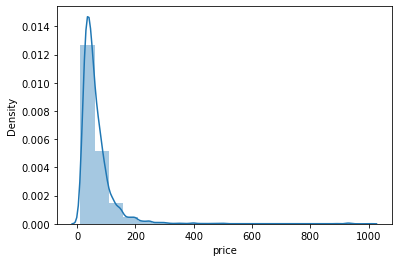

In [36]:
# Check the rating variable.

sns.distplot(berlin_clean['price'], bins=20)

In [37]:
berlin_clean.dtypes

area                                object
Gemeinde_s                          object
geometry                          geometry
id                                 float64
name                                object
host_id                            float64
host_name                           object
district                            object
latitude                           float64
longitude                          float64
room_type                           object
price                              float64
min_nights                         float64
nr_reviews                         float64
last_review                         object
reviews_per_month                  float64
calculated_host_listings_count     float64
availability_365                   float64
price category                      object
_merge                            category
dtype: object

In [38]:
berlin_clean.drop(columns ="_merge", inplace = True) 
# It's necessary to drop the categorical column; otherwise, the `to_file` function breaks.

C:\Users\laune\Anaconda3\envs\geo_env\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [39]:
out = r'C:\Users\laune\Desktop\6\Laura Asara - AirBnB Analysis - 2021-07\4 - AirBnB - Analysis\prices.shp'
berlin_clean.to_file(out)

C:\Users\laune\AppData\Local\Temp/ipykernel_15220/2758804740.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  berlin_clean.to_file(out)


### Plotting a choropleth

##### using choropleth

#### ! by using berlin_clean1 I do not get any Berlin map

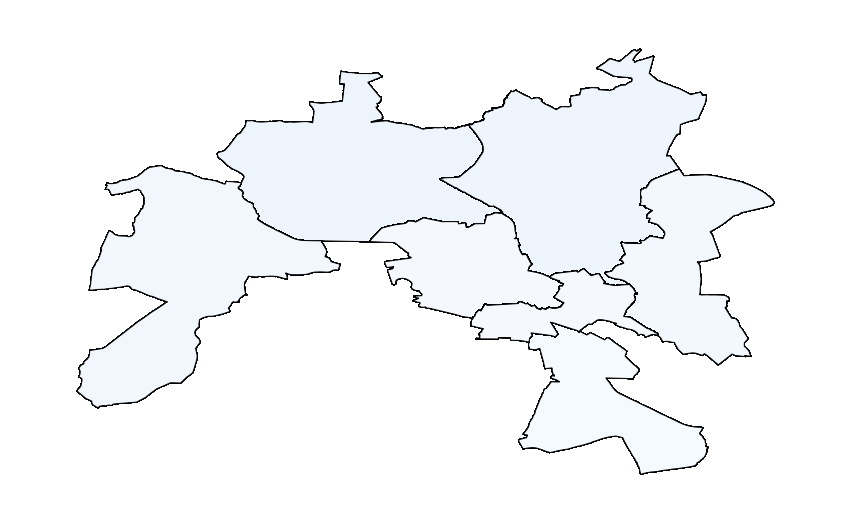

In [43]:
gplt = geoplot.choropleth(
    berlin_clean1, hue = 'price', cmap='Blues', figsize=(15, 15)
)

#### ! 4 areas are missing!


##### using matplotlib

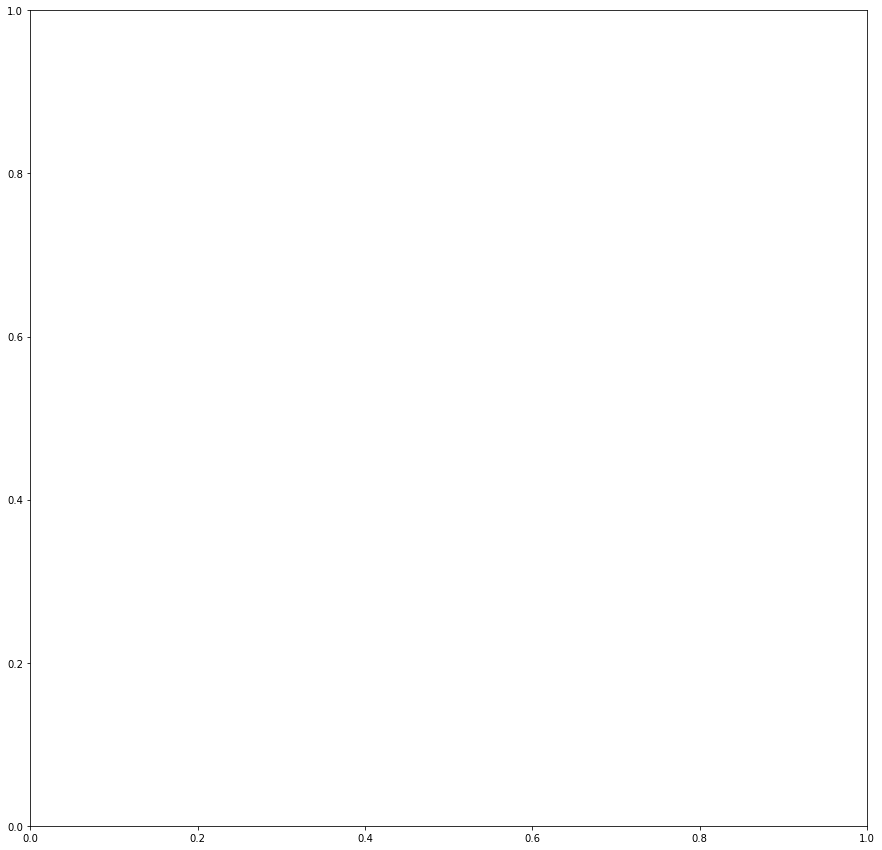

In [44]:
# Create a subplot with `fig` and `ax`.
fig, ax = plt.subplots(1, figsize=(15, 15))

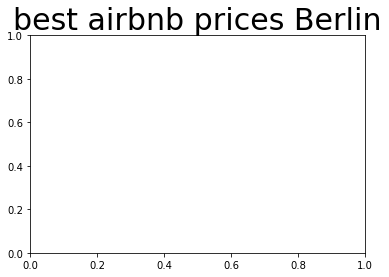

In [45]:
plt.title('best airbnb prices Berlin', size=30)
tl = berlin_clean1.plot(column='price',
cmap='Blues',      # Color map for the states                     
             linewidth=0.6,      # Line width for state borders
             ax=ax,              # Plotting the map on `ax`
             edgecolor='black'); # Area border colors

In [46]:
c_bar_colors = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=berlin_clean1['price'].min(), vmax=berlin_clean['price'].max()))

# Plot the colorbar.
color_bar = fig.colorbar(c_bar_colors)

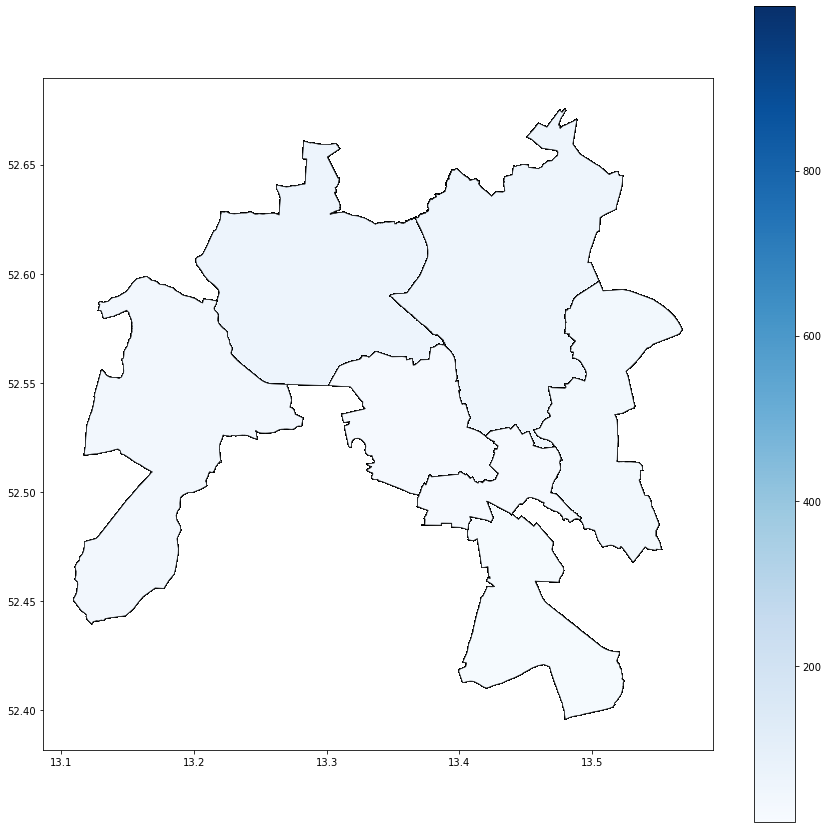

In [47]:
tl.figure